In [1]:
from absl import app, flags, logging
from absl.flags import FLAGS

import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
    ModelCheckpoint,
    TensorBoard
)
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny, YoloLoss,
    yolo_anchors, yolo_anchor_masks,
    yolo_tiny_anchors, yolo_tiny_anchor_masks
)
from yolov3_tf2.utils import freeze_all
import yolov3_tf2.dataset as dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

flags.DEFINE_string('dataset', '', 'path to dataset')
flags.DEFINE_string('val_dataset', '', 'path to validation dataset')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_enum('mode', 'fit', ['fit', 'eager_fit', 'eager_tf'],
                  'fit: model.fit, '
                  'eager_fit: model.fit(run_eagerly=True), '
                  'eager_tf: custom GradientTape')
flags.DEFINE_enum('transfer', 'none',
                  ['none', 'darknet', 'no_output', 'frozen', 'fine_tune'],
                  'none: Training from scratch, '
                  'darknet: Transfer darknet, '
                  'no_output: Transfer all but output, '
                  'frozen: Transfer and freeze all, '
                  'fine_tune: Transfer all and freeze darknet only')
flags.DEFINE_integer('size', 416, 'image size')
flags.DEFINE_integer('epochs', 2, 'number of epochs')
flags.DEFINE_integer('batch_size', 8, 'batch size')
flags.DEFINE_float('learning_rate', 1e-3, 'learning rate')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')
flags.DEFINE_integer('weights_num_classes', None, 'specify num class for `weights` file if different, '
                     'useful in transfer learning with different number of classes')


In [3]:
train_dataset = dataset.load_tfrecord_dataset(
            f'./data/voc2012_train.tfrecord',
            f'./data/voc2012.names', 416)

In [4]:
img, labels =next(iter(train_dataset))

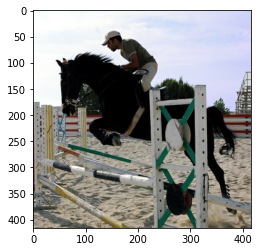

In [5]:
plt.imshow(img/255.)
plt.show()

In [6]:
box1 = labels[0][:4] * 416
box1 = box1.numpy()
box1 = box1.astype(np.int64)

box2 = labels[1][:4] * 416
box2 = box2.numpy()
box2 = box2.astype(np.int64)

box1, box2

(array([ 44,  81, 391, 395]), array([131,  41, 240, 157]))

In [7]:
img = cv2.rectangle(img.numpy(), (box1[0], box1[1]), (box1[2], box1[3]), (255,0,0), 3)
img = cv2.rectangle(img, (box2[0], box2[1]), (box2[2], box2[3]), (0,255,0), 3)

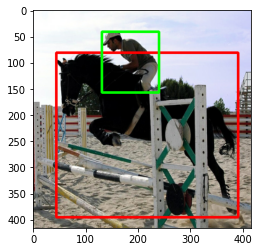

In [8]:
plt.imshow(img/255.)
plt.show()